C:\Python 311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


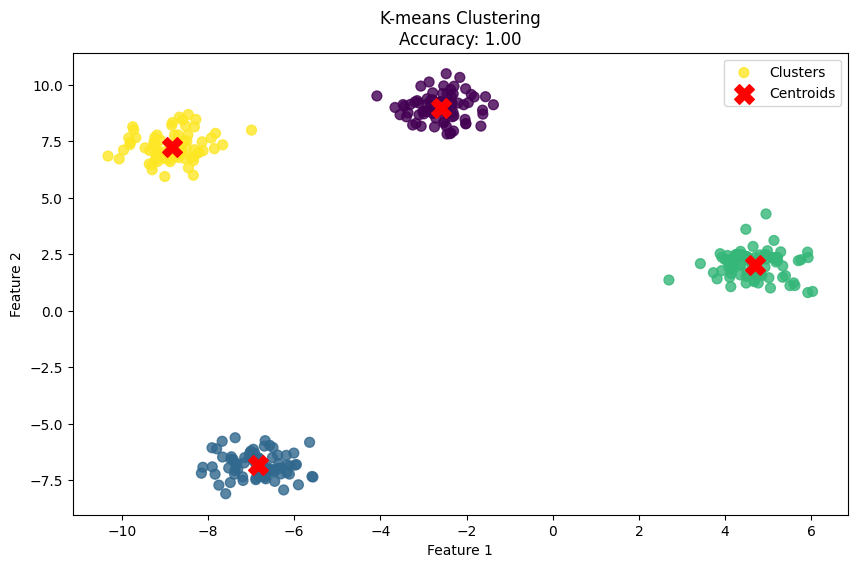

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Generate random data for clustering
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.60)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate accuracy (Note: Labels might be assigned differently by KMeans, so we need to match the clusters)
cluster_mapping = {0: np.argmax(np.bincount(y_kmeans[y_true == 0])),
                   1: np.argmax(np.bincount(y_kmeans[y_true == 1])),
                   2: np.argmax(np.bincount(y_kmeans[y_true == 2])),
                   3: np.argmax(np.bincount(y_kmeans[y_true == 3]))}

y_mapped = np.vectorize(cluster_mapping.get)(y_kmeans)
accuracy = accuracy_score(y_true, y_mapped)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.8, label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering\nAccuracy: {accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()